In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [2]:
prediction = pd.read_excel('../../../results/prediction_sector.xlsx')
prediction = prediction.dropna(how='all')

# Assuming your dataframe is named df
prediction = prediction.drop([1, 3])

# Assuming df is your DataFrame
prediction.set_index('Sector', inplace=True)
prediction
df=prediction.T

df

Sector,Mobile combustion,Electricity consumption,Solid waste,Residential heating,Commercial housing,Industrial,Agriculture,Wastewater
Hartford,4.26,1.79,0.38,2.07,1.67,0.32,0.17,0.23
Unnamed: 2,4.2,1.84,0.11,2.07,1.61,0.32,0.17,0.19
Unnamed: 3,-1.26,2.96,-69.9,-0.05,-3.81,-2.46,-1.03,-17.05
Unnamed: 4,2.81,1.31,0.0,1.36,1.0,0.35,0.03,0.09
Hartford.1,2.62,1.34,0.0,1.3,0.96,0.35,0.03,0.08
New Haven,-6.73,2.02,0,-4.86,-3.82,1.27,-5.62,-15.35
Unnamed: 7,2.9,1.67,0.29,1.49,0.76,0.11,0.01,0.08
Unnamed: 8,2.71,1.7,0.39,1.5,0.73,0.11,0.01,0.06
Unnamed: 9,-6.73,1.65,32.92,0.24,-3.83,-2.72,-5.62,-15.32
New Haven.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 3','New Haven','Unnamed: 9',])
df = df.drop(df.tail(6).index)
# Define the new row index names
new_index_names = ['Hartford, 2021', 'Hartford, 2035', 'New Haven, 2021', 'New Haven, 2035', 'Bridgeport, 2021','Bridgeport, 2035']

# Assign the new row index names to the DataFrame
df.index = new_index_names


df['stationary']=df['Residential heating']+df['Commercial housing']+df['Industrial']
df

Sector,Mobile combustion,Electricity consumption,Solid waste,Residential heating,Commercial housing,Industrial,Agriculture,Wastewater,stationary
"Hartford, 2021",4.26,1.79,0.38,2.07,1.67,0.32,0.17,0.23,4.06
"Hartford, 2035",4.2,1.84,0.11,2.07,1.61,0.32,0.17,0.19,4.0
"New Haven, 2021",2.81,1.31,0.0,1.36,1.0,0.35,0.03,0.09,2.71
"New Haven, 2035",2.62,1.34,0.0,1.3,0.96,0.35,0.03,0.08,2.61
"Bridgeport, 2021",2.9,1.67,0.29,1.49,0.76,0.11,0.01,0.08,2.36
"Bridgeport, 2035",2.71,1.7,0.39,1.5,0.73,0.11,0.01,0.06,2.34


In [4]:
pre = df.copy()
columns_to_drop = ['Residential heating', 'Commercial housing', 'Industrial']  # List of column names to drop

# Drop the specified columns
pre= pre.drop(columns=columns_to_drop)
pre['Total']=pre.iloc[:, :].sum(axis=1)
pre

Sector,Mobile combustion,Electricity consumption,Solid waste,Agriculture,Wastewater,stationary,Total
"Hartford, 2021",4.26,1.79,0.38,0.17,0.23,4.06,10.89
"Hartford, 2035",4.2,1.84,0.11,0.17,0.19,4.0,10.51
"New Haven, 2021",2.81,1.31,0.0,0.03,0.09,2.71,6.95
"New Haven, 2035",2.62,1.34,0.0,0.03,0.08,2.61,6.68
"Bridgeport, 2021",2.9,1.67,0.29,0.01,0.08,2.36,7.31
"Bridgeport, 2035",2.71,1.7,0.39,0.01,0.06,2.34,7.21


In [5]:
# Define the desired order of the index names
desired_order = ['Mobile combustion', 'Electricity consumption', 'stationary', 'Solid waste', 'Wastewater', 'Agriculture', 'Total']

# Rearrange the columns according to the desired order of the index names
pre = pre.reindex(desired_order, axis=1)
pre

Sector,Mobile combustion,Electricity consumption,stationary,Solid waste,Wastewater,Agriculture,Total
"Hartford, 2021",4.26,1.79,4.06,0.38,0.23,0.17,10.89
"Hartford, 2035",4.2,1.84,4.0,0.11,0.19,0.17,10.51
"New Haven, 2021",2.81,1.31,2.71,0.0,0.09,0.03,6.95
"New Haven, 2035",2.62,1.34,2.61,0.0,0.08,0.03,6.68
"Bridgeport, 2021",2.9,1.67,2.36,0.29,0.08,0.01,7.31
"Bridgeport, 2035",2.71,1.7,2.34,0.39,0.06,0.01,7.21


In [6]:
pre['mobile']=pre['Mobile combustion']/pre['Total']
pre['elec']=pre['Electricity consumption']/pre['Total']
pre['station']=pre['stationary']/pre['Total']
pre['solid']=pre['Solid waste']/pre['Total']
pre['waste']=pre['Wastewater']/pre['Total']
pre['agri']=pre['Agriculture']/pre['Total']

In [7]:
pre

Sector,Mobile combustion,Electricity consumption,stationary,Solid waste,Wastewater,Agriculture,Total,mobile,elec,station,solid,waste,agri
"Hartford, 2021",4.26,1.79,4.06,0.38,0.23,0.17,10.89,0.391185,0.164371,0.372819,0.034894,0.02112,0.015611
"Hartford, 2035",4.2,1.84,4.0,0.11,0.19,0.17,10.51,0.399619,0.175071,0.38059,0.010466,0.018078,0.016175
"New Haven, 2021",2.81,1.31,2.71,0.0,0.09,0.03,6.95,0.404317,0.188489,0.389928,0.0,0.01295,0.004317
"New Haven, 2035",2.62,1.34,2.61,0.0,0.08,0.03,6.68,0.392216,0.200599,0.390719,0.0,0.011976,0.004491
"Bridgeport, 2021",2.9,1.67,2.36,0.29,0.08,0.01,7.31,0.396717,0.228454,0.322845,0.039672,0.010944,0.001368
"Bridgeport, 2035",2.71,1.7,2.34,0.39,0.06,0.01,7.21,0.375867,0.235784,0.324549,0.054092,0.008322,0.001387


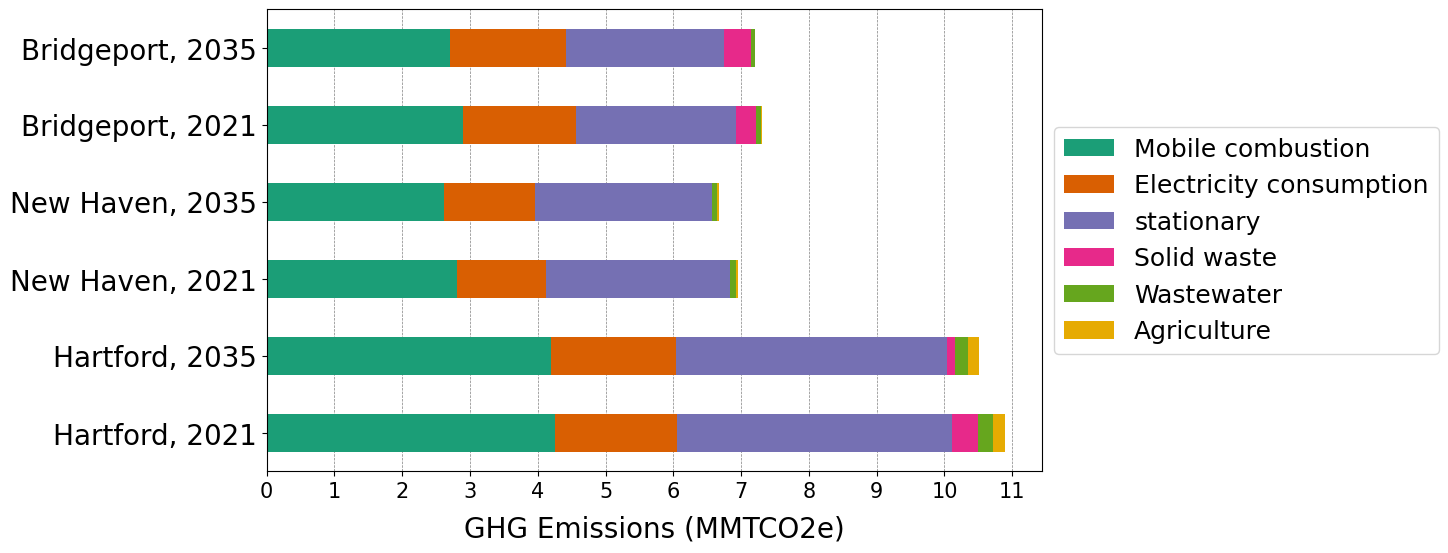

In [12]:
# Color settings
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']


# Plot
ax = pre.iloc[:,:-7].plot(kind='barh', stacked=True, figsize=(10, 6), width=0.5, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(0, 12, 1))
ax.tick_params(axis='y', labelsize=20)

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

    
plt.savefig('../../../figures/sector_emissions.png', dpi=600, bbox_inches='tight')

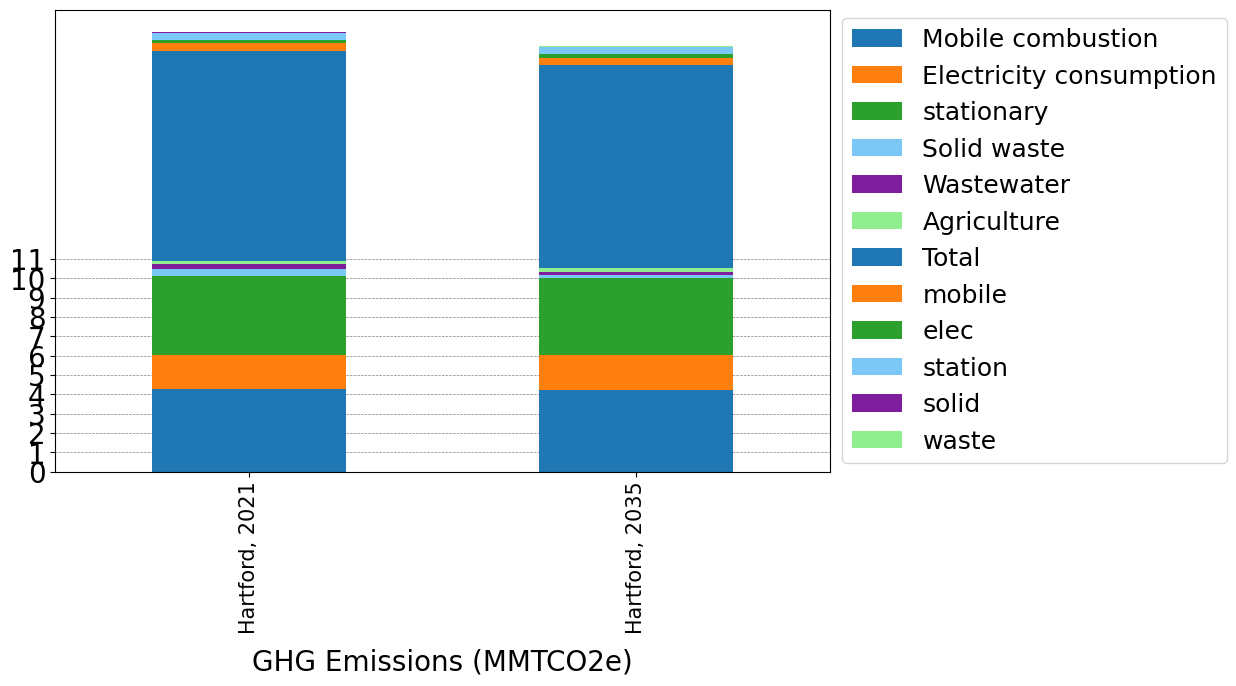

In [9]:
# Color settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7BC8F6', '#7E1E9C', '#90EE90']

# Plot
ax = pre.iloc[0:2,:-1].plot(kind='bar', stacked=True, figsize=(10, 6), width=0.5, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_yticks(range(0, 12, 1))
ax.tick_params(axis='y', labelsize=20)

# Draw horizontal grid lines manually
for y in ax.get_yticks():
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)


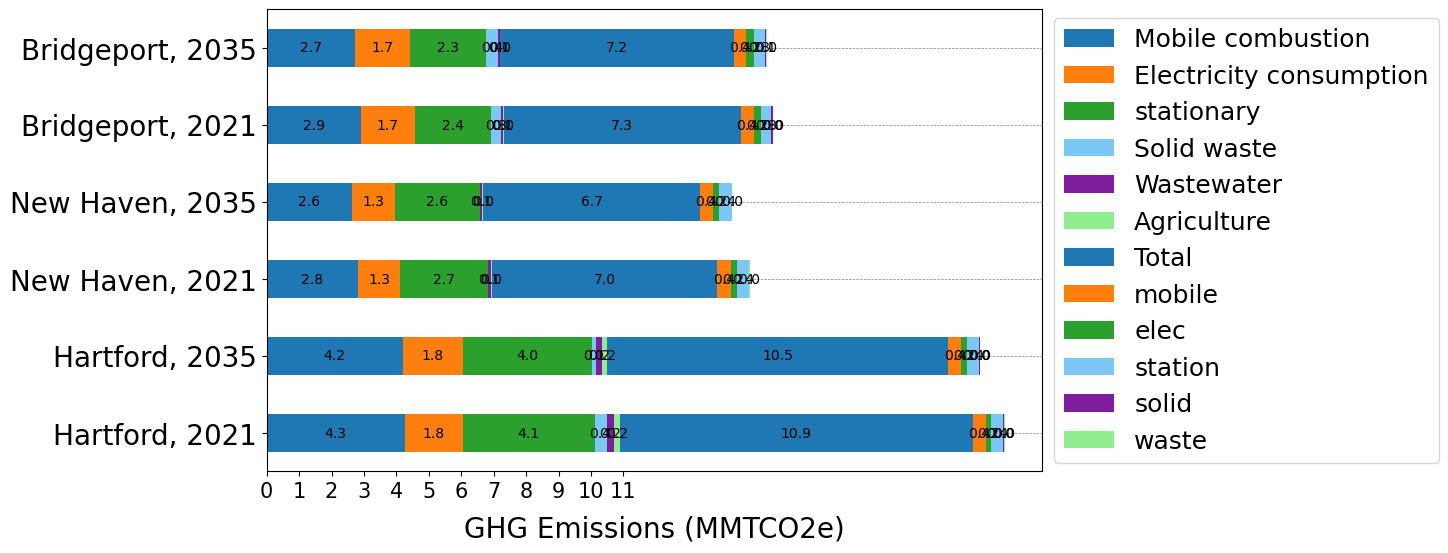

In [10]:
# Color settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7BC8F6', '#7E1E9C', '#90EE90']

# Plot
ax = pre.iloc[:,:-1].plot(kind='barh', stacked=True, figsize=(10, 6), width=0.5, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(0, 12, 1))
ax.tick_params(axis='y', labelsize=20)

# Draw horizontal grid lines manually
for y in ax.get_yticks():
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Annotate values
for rect in ax.patches:
    # Find where everything is located
    width = rect.get_width()
    height = rect.get_height()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the width of the annotation
    label_text = f'{width:.1f}'
    
    # Coordinate of the label, in this case, the center of the bar
    label_x = x + width / 2
    label_y = y + height / 2

    # Ensure text stays inside the plot
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, color='black')

plt.show()
